In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
decisionTreeClassifier = tree.DecisionTreeClassifier()

In [94]:
df_housing  = pd.read_csv("housing.csv")
df_housing = df_housing.dropna()
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [95]:
df_housing[df_housing.columns[0]].count()

20433

In [96]:
yMax = df_housing["median_income"].max()
yMin = df_housing["median_income"].min()
yPrep =( yMax-yMin) / 3
medianClear = []
for y in df_housing["median_income"]:
    y = y - yMin
    y = y / yPrep
    y = round(y) 
    y = y + 1
    medianClear.append(y)

df_housing["median_income_fit"] = medianClear
y = df_housing["median_income_fit"]
y

0        3
1        3
2        2
3        2
4        2
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: median_income_fit, Length: 20433, dtype: int64

In [97]:
for i in range(df_housing[df_housing.columns[0]].count()):
    if y.iloc[i] == 1: df_housing.iloc[i, 7] = "low"
    elif y.iloc[i] == 2: df_housing.iloc[i, 7] = "medium"
    elif y.iloc[i] == 3: df_housing.iloc[i, 7] = "high"
    elif y.iloc[i] == 4: df_housing.iloc[i, 7] = "very high"
    i = i + 1
df_housing["median_income"] = df_housing["median_income"].astype("category")
df_housing["median_income_cat"] = df_housing["median_income"].cat.codes
df_housing.median_income_cat

0        0
1        0
2        2
3        2
4        2
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: median_income_cat, Length: 20433, dtype: int8

[Text(0.5, 0.8333333333333334, 'X[9] <= 1.5\ngini = 0.497\nsamples = 16346\nvalue = [5583, 10139, 551, 73]'),
 Text(0.25, 0.5, 'X[9] <= 0.5\ngini = 0.164\nsamples = 6134\nvalue = [5583, 0, 551, 0]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 551\nvalue = [0, 0, 551, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 5583\nvalue = [5583, 0, 0, 0]'),
 Text(0.75, 0.5, 'X[8] <= 3.0\ngini = 0.014\nsamples = 10212\nvalue = [0, 10139, 0, 73]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 10139\nvalue = [0, 10139, 0, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 73\nvalue = [0, 0, 0, 73]')]

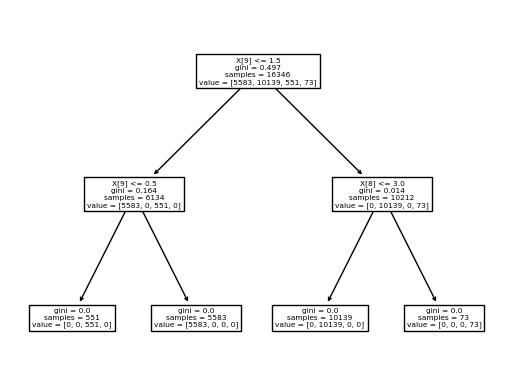

In [98]:
df_housing = df_housing.drop(columns="median_income")
df_housing = df_housing.drop(columns="ocean_proximity")
x_train, x_test, y_train, y_test = train_test_split(df_housing, y, test_size = 0.2, random_state=50)
decisionTreeClassifier = decisionTreeClassifier.fit(x_train, y_train)
tree.plot_tree(decisionTreeClassifier)